In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16  # Import VGG16 instead of InceptionV3
from tensorflow.keras.optimizers import Adam


In [2]:
# Data directories
data_dir_train = pathlib.Path("C:/Major Project 2023 7th sem/DATA SET/Train")
data_dir_test = pathlib.Path("C:/Major Project 2023 7th sem/DATA SET/Test")

In [3]:
# Parameters
batch_size = 32
img_height = 180
img_width = 180
num_classes = 9  # Update this with the number of classes in your dataset

In [4]:
# Data preprocessing and augmentation
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset="training",
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 2322 files belonging to 9 classes.
Using 1858 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset="validation",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2322 files belonging to 9 classes.
Using 464 files for validation.


In [6]:
# Model
base_model = VGG16(  # Use VGG16 instead of InceptionV3
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, 3)
)
base_model.trainable = False


In [7]:
model = Sequential([
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes)
])


In [8]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [9]:
# Train the model
epochs = 15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.1794 - loss: 2.1868 - val_accuracy: 0.2478 - val_loss: 1.9758
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.2571 - loss: 1.9814 - val_accuracy: 0.2823 - val_loss: 1.9198
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.2995 - loss: 1.8995 - val_accuracy: 0.2780 - val_loss: 1.8728
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.2929 - loss: 1.8590 - val_accuracy: 0.3685 - val_loss: 1.8164
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.3453 - loss: 1.8406 - val_accuracy: 0.3793 - val_loss: 1.7884
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.3308 - loss: 1.8001 - val_accuracy: 0.4116 - val_loss: 1.7589
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.3685 - loss: 1.7551 - val_accuracy: 0.3879 - val_loss: 1.7290
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.3871 - loss: 1.7149 - val_accuracy: 0.4052 - val_loss:

In [10]:
# Plotting training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

Text(0, 0.5, 'Accuracy')

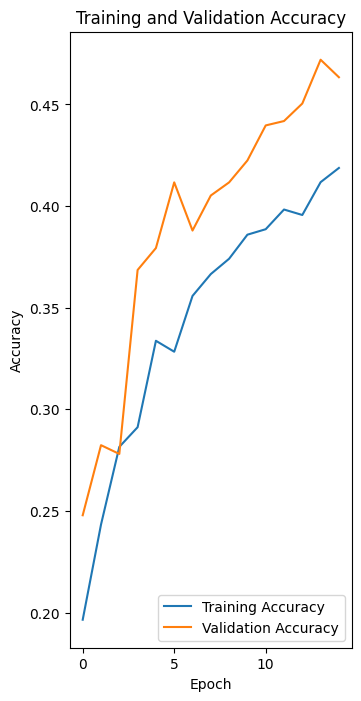

In [11]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

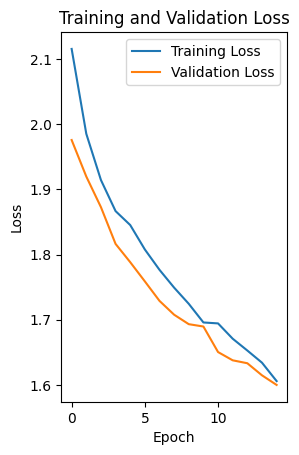

In [12]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()